# Exploring coherence in Grand Mesa

I want to explore one of the SnowEx Grand Mesa time series and look at how coherence changes over time. 

In [8]:
import os
import re
import numpy as np
import pandas as pd
import xarray as xr 
import rioxarray as rxa
import matplotlib.pyplot as plt

Current working directory should be /Users/julo9057/Library/CloudStorage/OneDrive-UCB-O365/Documents/geog6655_coherence but check this and change if necessary 

In [2]:
os.getcwd()
os.chdir('/Users/julo9057/Library/CloudStorage/OneDrive-UCB-O365/Documents/geog6655_coherence/')

Now get the data that we want. I'll look at tjust the 2020 timeseries, which has 7 image pairs 

In [3]:
data_dir = './data/data/snowex_grmesa'
# scenes = os.listdir(data_dir)

In [4]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if re.search(pattern, name):
                result.append(os.path.join(root, name))
    return result

In [ ]:
cor_files = find('_20.*HH.*cor', data_dir)
cor_files

We have the filenames for the coherence files of all HH polarizations in 2020. For simplicity, I will just use the HH polarizations. 

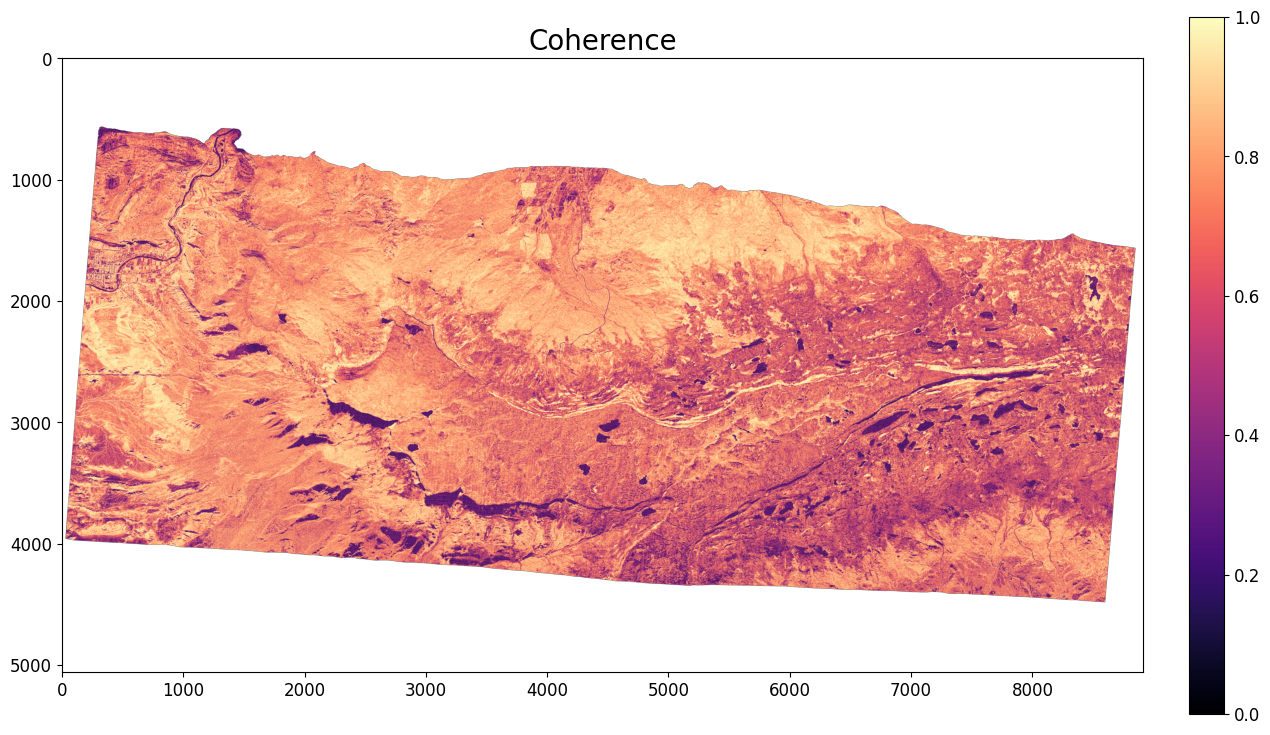

In [11]:
# coherence
cor_rast  = rxa.open_rasterio(cor_files[0])
cor = cor_rast[0].values

# plot coherence

plt.rcParams.update({'font.size': 12}) # increase plot font size for larger plot
fig, ax = plt.subplots(figsize=(15, 15))

ax.set_title("Coherence", fontsize= 20) #title and font size
img = ax.imshow(cor, cmap = 'magma', vmin = 0, vmax = 1)

# add legend
colorbar = fig.colorbar(img, ax=ax, fraction=0.03, pad=0.04) # add color bar
plt.show()